In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt

# Set dataset path
data_dir = r"C:\\Users\\Bhargav\\Desktop\\The IQ-OTHNCCD lung cancer dataset\\The IQ-OTHNCCD lung cancer dataset"

# Parameters
img_size = (128, 128)  # Reduce image size for faster processing
batch_size = 16        # Smaller batch size
epochs = 8             # Fewer epochs

# Data Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2,
    horizontal_flip=True,
    rotation_range=15,
    zoom_range=0.15
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
)

# Model Definition
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze all layers
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),  # Reduce the size of dense layers
    Dropout(0.4),                  # Dropout to prevent overfitting
    Dense(len(train_generator.class_indices), activation='softmax')
])

# Compile the Model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1),
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1),
]

# Train the Model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=callbacks
)

# Save the Model
model.save("optimized_lung_cancer_model.h5")

# Predict Function
def predict_image(image_path, model_path="optimized_lung_cancer_model.h5"):
    """
    Predict the class of a single image dynamically.
    """
    model = load_model(model_path)

    # Load and preprocess the image
    img = load_img(image_path, target_size=img_size)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    predictions = model.predict(img_array)
    class_labels = list(train_generator.class_indices.keys())
    predicted_class = class_labels[np.argmax(predictions)]

    print(f"Predicted class: {predicted_class}")
    print(f"Class probabilities: {predictions}")


Found 1166 images belonging to 3 classes.
Found 291 images belonging to 3 classes.


c:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/8
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.5708 - loss: 1.0620

c:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


72/72 ━━━━━━━━━━━━━━━━━━━━ 23s 217ms/step - accuracy: 0.5721 - loss: 1.0574 - val_accuracy: 0.7014 - val_loss: 0.6922 - learning_rate: 0.0010
Epoch 2/8
 1/72 ━━━━━━━━━━━━━━━━━━━━ 10s 148ms/step - accuracy: 0.8750 - loss: 0.4627

c:\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8750 - loss: 0.4627 - val_accuracy: 0.6667 - val_loss: 0.3607 - learning_rate: 0.0010
Epoch 3/8
72/72 ━━━━━━━━━━━━━━━━━━━━ 16s 219ms/step - accuracy: 0.7754 - loss: 0.4659 - val_accuracy: 0.6632 - val_loss: 0.5902 - learning_rate: 0.0010
Epoch 4/8
 1/72 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - accuracy: 0.7500 - loss: 0.5675
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - accuracy: 0.7500 - loss: 0.5675 - val_accuracy: 0.6667 - val_loss: 0.6560 - learning_rate: 0.0010
Epoch 5/8
72/72 ━━━━━━━━━━━━━━━━━━━━ 15s 208ms/step - accuracy: 0.8005 - loss: 0.3887 - val_accuracy: 0.7639 - val_loss: 0.5339 - learning_rate: 5.0000e-04
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 2.


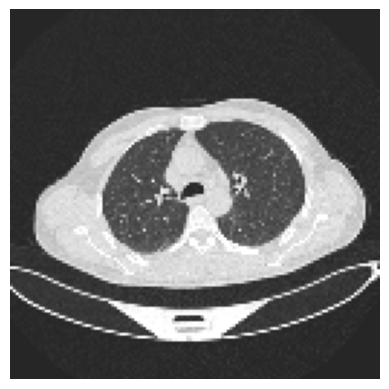

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted class: Bengin cases
Class probabilities: [[0.72934985 0.00244273 0.26820743]]


In [3]:
predict_image(r"C:\Users\Bhargav\Desktop\sc test folder\4.jpg")

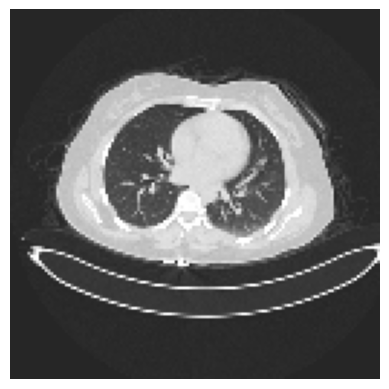

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted class: Malignant cases
Class probabilities: [[0.3970745  0.54877645 0.05414904]]


In [4]:
predict_image(r"C:\Users\Bhargav\Desktop\sc test folder\15.jpg")

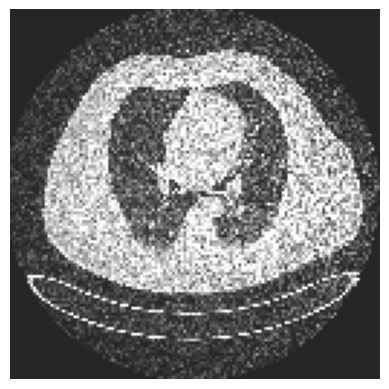

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted class: Normal cases
Class probabilities: [[0.17734449 0.00129496 0.82136047]]


In [6]:
predict_image(r"C:\Users\Bhargav\Desktop\sc test folder\22.jpg")